In [1]:
import os
import json
import pandas as pd
import h5py
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
#import geopandas as gpd

In [2]:
# test labels
#labels = '/mnt/lustre02/work/ka1176/shared_data/2021-ai4food/raw_data/ref_fusion_competition_south_africa_test_labels/ref_fusion_competition_south_africa_test_labels_34S_20E_259N/labels.geojson'
#south_africa_te_labels=gpd.read_file(labels)

In [115]:
train_data = h5py.File('/mnt/lustre02/work/ka1176/shared_data/2021-ai4food/dev_data/germany/planet-5/extracted/train_data.h5', 'r')
test_data = h5py.File('/mnt/lustre02/work/ka1176/shared_data/2021-ai4food/dev_data/germany/planet-5/extracted/test_data.h5', 'r')

In [116]:
numpy_path_train_1 = '/mnt/lustre02/work/ka1176/shared_data/2021-ai4food/dev_data/south-africa/planet/extracted/train_1'

In [117]:
with np.load(os.path.join(numpy_path_train_1, 'fid_185159.npz')) as data:
    a = data

In [118]:
for key in a.keys():
    print(key)

image_stack
mask
feature


244
[[[ 890  867  853 ... 1193 1185 1180]
  [ 907  915  914 ... 1181 1174 1167]
  [ 919  927  931 ... 1149 1139 1131]
  ...
  [ 710  689  686 ...  678  670  676]
  [ 749  740  734 ...  620  596  560]
  [ 782  776  768 ...  570  543  491]]

 [[1193 1166 1158 ... 1581 1574 1569]
  [1232 1229 1227 ... 1559 1554 1542]
  [1261 1259 1263 ... 1508 1499 1493]
  ...
  [ 991  953  926 ...  860  841  849]
  [1049 1024  994 ...  783  743  712]
  [1086 1070 1046 ...  714  668  618]]

 [[1625 1590 1568 ... 2092 2078 2058]
  [1666 1665 1646 ... 2072 2055 2038]
  [1696 1701 1698 ... 1998 1994 1984]
  ...
  [1382 1338 1322 ... 1167 1121 1085]
  [1466 1441 1428 ... 1077  985  903]
  [1550 1533 1505 ...  971  880  786]]

 [[2567 2560 2535 ... 2800 2791 2777]
  [2575 2574 2569 ... 2753 2745 2729]
  [2552 2554 2557 ... 2705 2695 2676]
  ...
  [2288 2284 2272 ... 2081 1998 1959]
  [2294 2294 2289 ... 2019 1917 1833]
  [2310 2309 2305 ... 1940 1860 1795]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(316, 253, 4)


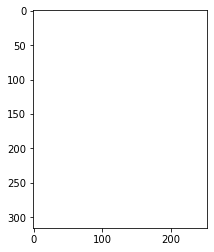

In [119]:
#img = mpimg.imread('../../doc/_static/stinkbug.png')
data = np.load(os.path.join(numpy_path_train_1, 'fid_185159.npz'))
print(len(data['image_stack']))
print(data['image_stack'][0])
img = data['image_stack'][0].swapaxes(0,2)
img = img.swapaxes(0,1)
print(img.shape)
#plt.imread(os.path.join(numpy_path_train_1, 'fid_185159.npz'))
plt.imshow(img[:,:,:3])

In [120]:
for i in range(len(train_data['image_stack'])):
    if train_data['fid'][i] == 185159:
        print(train_data['image_stack'][i][0])
        print(train_data['image_stack'][i][0].shape)
        print(train_data['image_stack'].shape)

In [121]:
file_sub = '../../ai4food/submission.json'
file_val = '../../ai4food/validation.json'
# Opening JSON file
f = open(file_sub,)
# returns JSON object as
# a dictionary
data_sub = json.load(f)
f1 = open(file_val,)
data_val = json.load(f1)

In [122]:
train_data.keys()

<KeysViewHDF5 ['crop_name', 'fid', 'image_stack', 'label', 'mask']>

In [123]:
test_data.keys()

<KeysViewHDF5 ['crop_name', 'fid', 'image_stack', 'label', 'mask']>

In [124]:
data_val.keys()

dict_keys(['fid', 'crop_id', 'crop_name', 'crop_probs'])

In [125]:
data_sub.keys()

dict_keys(['fid', 'crop_id', 'crop_name', 'crop_probs'])

In [126]:
type(data_val['fid']['0'])

int

In [127]:
type(data_sub['fid']['0'])

int

In [128]:
data_sub['fid']['0']

637

In [129]:
data_sub['crop_id']['0']

8

In [130]:
data_sub['crop_name']['0']

'Root'

In [131]:
data_sub['crop_probs']['0']

[0.0013175087,
 0.0020544025,
 0.0002713551,
 0.0012387446,
 0.0005228878,
 0.0007741437,
 0.0016328898,
 0.8197127581,
 0.1724753488]

In [132]:
np.unique(train_data['label'][:])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [133]:
np.unique(list(data_val['crop_id'].values()))

array([1, 2, 3, 4, 5, 6, 8, 9])

In [134]:
np.unique(list(data_sub['crop_id'].values()))

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [135]:
np.unique(list(data_sub['crop_name'].values()))

array(['Barley', 'Corn', 'Crops', 'Oats', 'Oil', 'Root', 'Rye', 'Seeds',
       'Wheat'], dtype='<U6')

In [136]:
len(data_sub['crop_id'])

2063

In [137]:
len(data_val['fid'])

2504

In [138]:
len(data_sub['fid'])

2063

In [139]:
# validation data length
len(train_data['label'][:])-int(len(train_data['label'][:])*0.8)

501

In [140]:
len(test_data['fid'][:])

2063

In [154]:
test_data['fid'][:]

array([185471, 185489, 185490, ..., 272429, 272640, 272740])

In [155]:
data_sub['fid']

{'0': 185471,
 '1': 185489,
 '2': 185490,
 '3': 185495,
 '4': 185502,
 '5': 185536,
 '6': 185542,
 '7': 185614,
 '8': 185622,
 '9': 185686,
 '10': 185724,
 '11': 187813,
 '12': 187846,
 '13': 187961,
 '14': 188135,
 '15': 188169,
 '16': 185472,
 '17': 185488,
 '18': 185493,
 '19': 185494,
 '20': 185505,
 '21': 185509,
 '22': 185510,
 '23': 185535,
 '24': 185541,
 '25': 185543,
 '26': 185544,
 '27': 185545,
 '28': 185546,
 '29': 185547,
 '30': 185549,
 '31': 185550,
 '32': 185551,
 '33': 185552,
 '34': 185553,
 '35': 185555,
 '36': 185556,
 '37': 185557,
 '38': 185558,
 '39': 185559,
 '40': 185560,
 '41': 185561,
 '42': 185588,
 '43': 185589,
 '44': 185590,
 '45': 185591,
 '46': 185592,
 '47': 185593,
 '48': 185594,
 '49': 185595,
 '50': 185596,
 '51': 185597,
 '52': 185599,
 '53': 185600,
 '54': 185601,
 '55': 185602,
 '56': 185603,
 '57': 185605,
 '58': 185606,
 '59': 185607,
 '60': 185608,
 '61': 185609,
 '62': 185610,
 '63': 185612,
 '64': 185613,
 '65': 185615,
 '66': 185623,
 '67'

In [156]:
ct = 0
for i,item in enumerate(data_sub['fid'].items()):
    if item[1] not in test_data['fid']:
        ct+=1
        print(i, test_data['fid'][i])
print(ct)

0


In [157]:
for i in range(len(test_data['fid'][:])):
    if test_data['fid'][i] not in data_sub['fid'].values():
        print(i, test_data['fid'][i])

In [158]:
data_sub['crop_name']

{'0': 'Barley',
 '1': 'Wheat',
 '2': 'Wheat',
 '3': 'Wheat',
 '4': 'Wheat',
 '5': 'Barley',
 '6': 'Wheat',
 '7': 'Wheat',
 '8': 'Barley',
 '9': 'Wheat',
 '10': 'Wheat',
 '11': 'Barley',
 '12': 'Wheat',
 '13': 'Wheat',
 '14': 'Wheat',
 '15': 'Barley',
 '16': 'Barley',
 '17': 'Barley',
 '18': 'Barley',
 '19': 'Barley',
 '20': 'Wheat',
 '21': 'Wheat',
 '22': 'Wheat',
 '23': 'Wheat',
 '24': 'Barley',
 '25': 'Wheat',
 '26': 'Barley',
 '27': 'Wheat',
 '28': 'Wheat',
 '29': 'Wheat',
 '30': 'Wheat',
 '31': 'Wheat',
 '32': 'Wheat',
 '33': 'Wheat',
 '34': 'Wheat',
 '35': 'Wheat',
 '36': 'Wheat',
 '37': 'Barley',
 '38': 'Barley',
 '39': 'Wheat',
 '40': 'Wheat',
 '41': 'Wheat',
 '42': 'Wheat',
 '43': 'Wheat',
 '44': 'Wheat',
 '45': 'Canola',
 '46': 'Barley',
 '47': 'Wheat',
 '48': 'Barley',
 '49': 'Barley',
 '50': 'Barley',
 '51': 'Barley',
 '52': 'Wheat',
 '53': 'Wheat',
 '54': 'Wheat',
 '55': 'Lucerne/Medics',
 '56': 'Wheat',
 '57': 'Lucerne/Medics',
 '58': 'Wheat',
 '59': 'Wheat',
 '60': 'Wheat

In [ ]:
#assert len(data) == len(south_africa_te_labels), "WARNING: The size of the predictions is not equal to number of test fields. " \
#"Number of test fields: {}, Number of predictions: {}".format(len(output_frame),len(south_africa_te_labels))